####  you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also, you should plot their objective values versus epochs and compare their training and testing accuracy. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [1]:
# Load Packages
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [2]:
data = pd.read_csv("data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## 1.2 Examine and clean data

In [3]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
# Dropped unnecessary columns
data.drop(data.columns[[0, 32]], axis = 1, inplace = True) 

# Replacing M with 0 and B with 1
data["diagnosis"].replace({"M": -1, "B": 1}, inplace = True) # Replacing M with -1 and B with 1
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,-1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,-1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,-1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 1.3. Partition to training and testing sets

In [4]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machine learning.
# Dropping target feature and storing it in y.
X, y = np.asarray(data.iloc[:,1:]), np.asarray(data.iloc[:,0:1]) 
#splitting dataset in training and testing dataset.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # Test train split

## 1.4. Feature scaling

Use the standardization to transform both training and test features

In [5]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).reshape(1, d)
sig = numpy.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
[ 0.09846829  0.02105125  0.09716162  0.13319684  0.04198499  0.04983166
  0.12638982  0.09525404  0.07707492  0.02220756  0.26450984  0.05625726
  0.27588685  0.35049629 -0.00287044 -0.01259705  0.05541236 -0.08305956
  0.2256218   0.05480612  0.11776221  0.05911909  0.12113957  0.1454764
  0.03303297  0.03909026  0.13357497  0.03778099  0.2038324   0.12162127]
test std = 
[1.15561532 0.9916339  1.14949548 1.23696983 1.01375089 0.97291343
 1.08508832 1.068175   0.9237933  1.19951943 1.67120846 0.9575115
 1.73919545 2.22149969 1.11575893 0.96982156 1.20181084 0.94377501
 1.20810352 0.86159347 1.14110861 1.0073918  1.15753485 1.22125306
 1.08660755 1.11864561 1.1973734  1.02956169 1.1997496  1.3217767 ]


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistic regression and when $\lambda > 0$, it essentially becomes a regularized logistic regression.

In [6]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):

  yxw = np.dot(np.multiply(y,x),w)
  exponential_Term = np.exp(-yxw)
  
  Obj1 = np.mean(np.log(1 + exponential_Term))
  Obj2 = (lam / 2) * np.sum(w * w)
  
  objvalue = Obj1 + Obj2
  
  return objvalue

  pass

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [7]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):

  yx = np.multiply(y, x)
  exponential_Term = np.exp(np.dot(yx, w))
  
  G1 = -np.mean(np.divide(yx, 1 + exponential_Term),axis = 0).reshape(d,1)
  G2 = lam * w
  
  g = G1 + G2
  
  return g
  
  pass

In [8]:
# Gradient descent for solving logistic regression
# You will need to do iterative processes (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
  
  objvals = np.zeros(max_epoch) # making an array to store objective values

  for z in range(0,max_epoch) :

    current_Objective_Value = objective(w, x, y, lam) 
    current_Gradient = gradient(w, x, y, lam)

    w -= learning_rate  * current_Gradient # updating weight

    objvals[z] = current_Objective_Value 

    print(f'Iteration number: {z+1} Current Objective Value: {objvals[z]}')

  return w, objvals
  
  pass

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [9]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 1
w = np.zeros((d,1))
w_GD, obj_value_gd = gradient_descent(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.6931471805599453
Iteration number: 2 Current Objective Value: 0.17001750257758133
Iteration number: 3 Current Objective Value: 0.13895204379757714
Iteration number: 4 Current Objective Value: 0.12201292707159705
Iteration number: 5 Current Objective Value: 0.11308096191112656
Iteration number: 6 Current Objective Value: 0.10782741774777573
Iteration number: 7 Current Objective Value: 0.10389073243630481
Iteration number: 8 Current Objective Value: 0.1006187822611476
Iteration number: 9 Current Objective Value: 0.09778710533194178
Iteration number: 10 Current Objective Value: 0.09528563925883861
Iteration number: 11 Current Objective Value: 0.09304698843075072
Iteration number: 12 Current Objective Value: 0.09102441960127003
Iteration number: 13 Current Objective Value: 0.08918319244407318
Iteration number: 14 Current Objective Value: 0.08749639350001463
Iteration number: 15 Current Objective Value: 0.08594260844205202
Iteration number: 16 

In [10]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.000001
learning_rate = 1
w = np.zeros((d,1))
w_GD_REG, obj_value_gd_reg = gradient_descent(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.6931471805599453
Iteration number: 2 Current Objective Value: 0.1700185488924667
Iteration number: 3 Current Objective Value: 0.13895316356566675
Iteration number: 4 Current Objective Value: 0.1220141862382821
Iteration number: 5 Current Objective Value: 0.1130823805034201
Iteration number: 6 Current Objective Value: 0.10782898054663523
Iteration number: 7 Current Objective Value: 0.10389242655545354
Iteration number: 8 Current Objective Value: 0.10062059921686813
Iteration number: 9 Current Objective Value: 0.0977890387185298
Iteration number: 10 Current Objective Value: 0.0952876838959905
Iteration number: 11 Current Objective Value: 0.0930491399626965
Iteration number: 12 Current Objective Value: 0.09102667427034235
Iteration number: 13 Current Objective Value: 0.08918554694920747
Iteration number: 14 Current Objective Value: 0.08749884490211708
Iteration number: 15 Current Objective Value: 0.08594515409728437
Iteration number: 16 Curre

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [11]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
  
  yixi = yi * xi
  yixiw = float(np.dot(yixi,w))
  
  Obj1 = np.log(1 + np.exp(-yixiw))
  Obj2 = (lam / 2) * np.sum(w * w)
  
  obj = Obj1 + Obj2
  
  G1 = -yixi.T/(1 + np.exp(yixiw))
  G2 = lam * w
  
  g = G1 + G2
  return obj, g
  
  pass

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [12]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):

  n = x.shape[0]
  objvals = np.zeros(max_epoch)

  for i in range(0, max_epoch):

    # shuffling 
    rndm_Indices = np.random.permutation(n)
    x_rndm, y_rndm = x[rndm_Indices, :], y[rndm_Indices, :]

    current_Obj_Value = 0
    for j in range(0,n):
      xi, yi = x_rndm[j, :].reshape(1,d), float(y_rndm[j, :])
      curr_Obj, g = stochastic_objective_gradient(w, xi, yi, lam)
      w -= learning_rate * g # update weights
      current_Obj_Value += curr_Obj
    
    learning_rate *= 0.95
    current_Obj_Value /= n
    objvals[i] = current_Obj_Value
    print(f'Iteration number: {i+1} Current Objective Value: {objvals[i]}')

  return w, objvals

  pass

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [13]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 1
w = np.zeros((d,1))
w_SGD, obj_value_sgd = sgd(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.45904857171838404
Iteration number: 2 Current Objective Value: 0.22152348823178272
Iteration number: 3 Current Objective Value: 0.2583501309476069
Iteration number: 4 Current Objective Value: 0.25868129260102374
Iteration number: 5 Current Objective Value: 0.22818288056537978
Iteration number: 6 Current Objective Value: 0.1384057283463276
Iteration number: 7 Current Objective Value: 0.11328067339437724
Iteration number: 8 Current Objective Value: 0.19218315602494768
Iteration number: 9 Current Objective Value: 0.06523637932927986
Iteration number: 10 Current Objective Value: 0.1638489682929377
Iteration number: 11 Current Objective Value: 0.12081470753779183
Iteration number: 12 Current Objective Value: 0.1083013128937812
Iteration number: 13 Current Objective Value: 0.05473336311197603
Iteration number: 14 Current Objective Value: 0.04797114133448048
Iteration number: 15 Current Objective Value: 0.0523828423336764
Iteration number: 16 Cur

In [14]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.000001
learning_rate = 1
w = np.zeros((x_train.shape[1],1))
w_SGD_REG, obj_value_sgd_reg = sgd(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.3988947379627104
Iteration number: 2 Current Objective Value: 0.17139648949916883
Iteration number: 3 Current Objective Value: 0.22091449122942583
Iteration number: 4 Current Objective Value: 0.24520748005367596
Iteration number: 5 Current Objective Value: 0.14321260998599797
Iteration number: 6 Current Objective Value: 0.11552545824764535
Iteration number: 7 Current Objective Value: 0.09919456929735225
Iteration number: 8 Current Objective Value: 0.06455883366805548
Iteration number: 9 Current Objective Value: 0.13911246777802588
Iteration number: 10 Current Objective Value: 0.23772784772152358
Iteration number: 11 Current Objective Value: 0.16016925979942515
Iteration number: 12 Current Objective Value: 0.09831801795262377
Iteration number: 13 Current Objective Value: 0.11505679197202075
Iteration number: 14 Current Objective Value: 0.06502022434031544
Iteration number: 15 Current Objective Value: 0.08522962366872402
Iteration number: 16

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [15]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):

  yixi = np.multiply(yi, xi)
  yixiw = np.dot(yixi, w)
  
  Obj1 = np.mean(np.log(1 + np.exp(-yixiw)))
  Obj2 = (lam/2) * np.sum(w * w)
  
  obj = Obj1 + Obj2
  
  G1 = np.mean(np.divide(-yixi, 1 + np.exp(yixiw)), axis = 0).reshape(d,1)
  G2 = lam * w
  
  g = G1 + G2
  
  return obj, g
  
  pass

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [16]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):

  objvals = np.zeros(max_epoch)
  batch_Size = 10
  n = x.shape[0]

  for i in range(max_epoch) :
    
    rndm_Indices = np.random.permutation(n)
    x_rndm, y_rndm = x[rndm_Indices, : ], y [rndm_Indices, : ]
    
    current_Obj_Value = 0
    for j in range(0, n, batch_Size):
      xi, yi = x_rndm[j : j + batch_Size, :], y_rndm[j : j + batch_Size, :]
      curr_Obj, g = mb_objective_gradient(w, xi, yi, lam)
      current_Obj_Value += curr_Obj
      w -= learning_rate * g

    learning_rate *= 0.95
    current_Obj_Value /= (n/batch_Size)
    objvals[i] = current_Obj_Value
    print(f'Iteration number: {i+1} Current Objective Value: {objvals[i]}')

  
  return w, objvals
  pass

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [17]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 1
w = np.zeros((x_train.shape[1],1))
w_MBGD, obj_value_mbgd = mbgd(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.1138627882382831
Iteration number: 2 Current Objective Value: 0.06282958048524258
Iteration number: 3 Current Objective Value: 0.05435094874163979
Iteration number: 4 Current Objective Value: 0.051298606339948954
Iteration number: 5 Current Objective Value: 0.04830962539636071
Iteration number: 6 Current Objective Value: 0.04597496033118972
Iteration number: 7 Current Objective Value: 0.04452332023684668
Iteration number: 8 Current Objective Value: 0.04346461197927203
Iteration number: 9 Current Objective Value: 0.040554887051474336
Iteration number: 10 Current Objective Value: 0.04127323552804113
Iteration number: 11 Current Objective Value: 0.039370123747865034
Iteration number: 12 Current Objective Value: 0.03820265519211409
Iteration number: 13 Current Objective Value: 0.03739064516063011
Iteration number: 14 Current Objective Value: 0.038098739887347195
Iteration number: 15 Current Objective Value: 0.0367242978357271
Iteration number:

In [18]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.000001
learning_rate = 1
w = np.zeros((x_train.shape[1],1))
w_MBGD_REG, obj_value_mbgd_reg = mbgd(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.11104688621520847
Iteration number: 2 Current Objective Value: 0.06671746889823636
Iteration number: 3 Current Objective Value: 0.05750323736178438
Iteration number: 4 Current Objective Value: 0.05545493119875436
Iteration number: 5 Current Objective Value: 0.04855914494414417
Iteration number: 6 Current Objective Value: 0.04754946388400939
Iteration number: 7 Current Objective Value: 0.04329673884466853
Iteration number: 8 Current Objective Value: 0.041855221873335756
Iteration number: 9 Current Objective Value: 0.041096448522545695
Iteration number: 10 Current Objective Value: 0.03952401533576728
Iteration number: 11 Current Objective Value: 0.03948975046148922
Iteration number: 12 Current Objective Value: 0.03847858404897913
Iteration number: 13 Current Objective Value: 0.03850242904467933
Iteration number: 14 Current Objective Value: 0.03823970524268212
Iteration number: 15 Current Objective Value: 0.03767071164240979
Iteration number:

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

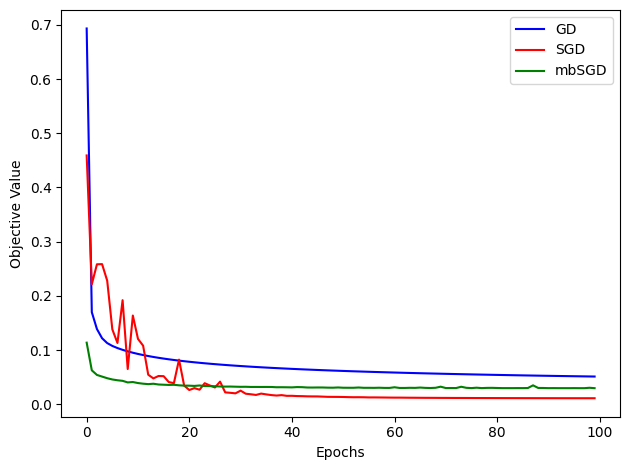

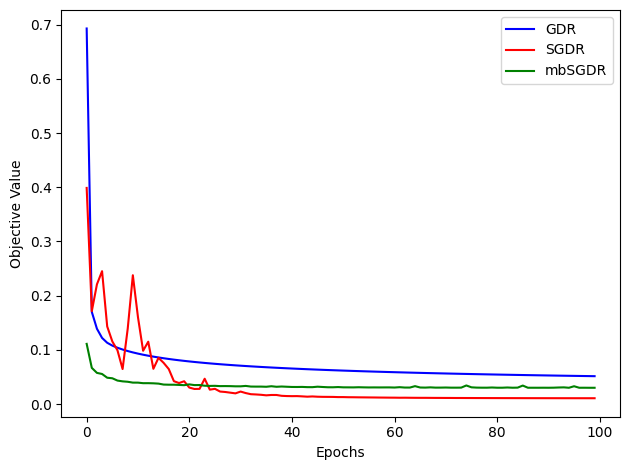

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

max_epoch = 100

line0, = plt.plot(range(0,max_epoch), obj_value_gd, '-b')
line1, = plt.plot(range(0,max_epoch), obj_value_sgd, '-r')
line2, = plt.plot(range(0,max_epoch), obj_value_mbgd, '-g')

plt.ylabel('Objective Value', fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.legend([line0, line1, line2], ['GD', 'SGD', 'mbSGD'], fontsize=10)
plt.tight_layout()
plt.show()

line0, = plt.plot(range(0,max_epoch), obj_value_gd_reg, '-b')
line1, = plt.plot(range(0,max_epoch), obj_value_sgd_reg, '-r')
line2, = plt.plot(range(0,max_epoch), obj_value_mbgd_reg, '-g')

plt.ylabel('Objective Value', fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.legend([line0, line1, line2], ['GDR', 'SGDR', 'mbSGDR'], fontsize=10)
plt.tight_layout()
plt.show()


# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [20]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
  f = np.sign(np.dot(X,w))
  return np.asarray(f)
  pass

In [21]:
# evaluate training error of logistic regression and regularized version

# gradient descent
pred_gd = predict(w_GD, x_train)
Error = numpy.abs(pred_gd - y_train) / 2
error_pred_gd = numpy.mean(Error)
print('Error in Training dataset for Gradient Descent is ' + str(error_pred_gd))

# stochastic gradient descent
pred_sgd = predict(w_SGD, x_train)
Error = numpy.abs(pred_sgd - y_train) / 2
error_pred_sgd = numpy.mean(Error)
print('Error in Training dataset for Stochastic Gradient Descent is ' + str(error_pred_sgd))

# mini batch gradient descent
pred_mbgd = predict(w_MBGD, x_train)
Error = numpy.abs(pred_mbgd - y_train) / 2
error_pred_mbgd = numpy.mean(Error)
print('Error in Training dataset for Mini-Batch Gradient Descent is ' + str(error_pred_mbgd))

# gradient descent(regularized)
pred_gd_reg = predict(w_GD_REG, x_train)
Error = numpy.abs(pred_gd_reg - y_train) / 2
error_pred_gd_reg = numpy.mean(Error)
print('Error in Training dataset for Gradient Descent (Regularized) is ' + str(error_pred_gd_reg))

# stochastic gradient descent(regularized)
pred_sgd_reg = predict(w_SGD_REG, x_train)
Error = numpy.abs(pred_sgd_reg - y_train) / 2
error_pred_sgd_reg = numpy.mean(Error)
print('Error in Training dataset for Stochastic Gradient Descent (Regularized) is ' + str(error_pred_sgd_reg))

# mini batch gradient descent(regularized)
pred_mbgd_reg = predict(w_MBGD_REG, x_train)
Error = numpy.abs(pred_mbgd_reg - y_train) / 2
error_pred_mbgd_reg = numpy.mean(Error)
print('Error in Training dataset for Mini-Batch Gradient Descent (Regularized) is ' + str(error_pred_mbgd_reg))


Error in Training dataset for Gradient Descent is 0.013186813186813187
Error in Training dataset for Stochastic Gradient Descent is 0.002197802197802198
Error in Training dataset for Mini-Batch Gradient Descent is 0.008791208791208791
Error in Training dataset for Gradient Descent (Regularized) is 0.013186813186813187
Error in Training dataset for Stochastic Gradient Descent (Regularized) is 0.002197802197802198
Error in Training dataset for Mini-Batch Gradient Descent (Regularized) is 0.008791208791208791


In [22]:
# evaluate testing error of logistic regression and regularized version

# gradient descent
pred_gd = predict(w_GD, x_test)
Error = numpy.abs(pred_gd - y_test) / 2
error_pred_gd = numpy.mean(Error)
print('Error in Testing dataset for Gradient Descent is ' + str(error_pred_gd))

# stochastic gradient descent
pred_sgd = predict(w_SGD, x_test)
Error = numpy.abs(pred_sgd - y_test) / 2
error_pred_sgd = numpy.mean(Error)
print('Error in Testing dataset for Stochastic Gradient Descent is ' + str(error_pred_sgd))

# mini batch gradient descent
pred_mbgd = predict(w_MBGD, x_test)
Error = numpy.abs(pred_mbgd - y_test) / 2
error_pred_mbgd = numpy.mean(Error)
print('Error in Testing dataset for Mini-Batch Gradient Descent is ' + str(error_pred_mbgd))

# gradient descent(regularized)
pred_gd_reg = predict(w_GD_REG, x_test)
Error = numpy.abs(pred_gd_reg - y_test) / 2
error_pred_gd_reg = numpy.mean(Error)
print('Error in Testing dataset for Gradient Descent (Regularized) is ' + str(error_pred_gd_reg))

# stochastic gradient descent(regularized)
pred_sgd_reg = predict(w_SGD_REG, x_test)
Error = numpy.abs(pred_sgd_reg - y_test) / 2
error_pred_sgd_reg = numpy.mean(Error)
print('Error in Testing dataset for Stochastic Gradient Descent (Regularized) is ' + str(error_pred_sgd_reg))

# mini batch gradient descent(regularized)
pred_mbgd_reg = predict(w_MBGD_REG, x_test)
Error = numpy.abs(pred_mbgd_reg - y_test) / 2
error_pred_mbgd_reg = numpy.mean(Error)
print('Error in Testing dataset for Mini-Batch Gradient Descent (Regularized) is ' + str(error_pred_mbgd_reg))

Error in Testing dataset for Gradient Descent is 0.02631578947368421
Error in Testing dataset for Stochastic Gradient Descent is 0.02631578947368421
Error in Testing dataset for Mini-Batch Gradient Descent is 0.02631578947368421
Error in Testing dataset for Gradient Descent (Regularized) is 0.02631578947368421
Error in Testing dataset for Stochastic Gradient Descent (Regularized) is 0.02631578947368421
Error in Testing dataset for Mini-Batch Gradient Descent (Regularized) is 0.02631578947368421


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

In [23]:
lam = 0.0001
learning_rate = 1
w = np.zeros((d,1))

In [24]:
w_GD, obj_value_gd = gradient_descent(x_train, y_train, lam, learning_rate, w, 1000)

Iteration number: 1 Current Objective Value: 0.6931471805599453
Iteration number: 2 Current Objective Value: 0.17012213406611762
Iteration number: 3 Current Objective Value: 0.13906400077411965
Iteration number: 4 Current Objective Value: 0.12213880603762639
Iteration number: 5 Current Objective Value: 0.11322276464307639
Iteration number: 6 Current Objective Value: 0.10798362104967402
Iteration number: 7 Current Objective Value: 0.10406004676410457
Iteration number: 8 Current Objective Value: 0.10080035824642906
Iteration number: 9 Current Objective Value: 0.09798030139304911
Iteration number: 10 Current Objective Value: 0.09548993636241487
Iteration number: 11 Current Objective Value: 0.09326195001172602
Iteration number: 12 Current Objective Value: 0.09124966892246412
Iteration number: 13 Current Objective Value: 0.08941839844750421
Iteration number: 14 Current Objective Value: 0.08774126134414528
Iteration number: 15 Current Objective Value: 0.08619687283017277
Iteration number: 16

In [25]:
w_sGD, obj_value_sgd = sgd(x_train, y_train, lam, learning_rate, w, 1000)

Iteration number: 1 Current Objective Value: 0.27860301867210124
Iteration number: 2 Current Objective Value: 0.18223946045709594
Iteration number: 3 Current Objective Value: 0.3207869214400415
Iteration number: 4 Current Objective Value: 0.1933384004597344
Iteration number: 5 Current Objective Value: 0.1956433171871641
Iteration number: 6 Current Objective Value: 0.2387774534751289
Iteration number: 7 Current Objective Value: 0.13166200594635455
Iteration number: 8 Current Objective Value: 0.17770691945632586
Iteration number: 9 Current Objective Value: 0.15542927923629632
Iteration number: 10 Current Objective Value: 0.1326725684059027
Iteration number: 11 Current Objective Value: 0.1109836232569448
Iteration number: 12 Current Objective Value: 0.08446655107169321
Iteration number: 13 Current Objective Value: 0.06469878552448614
Iteration number: 14 Current Objective Value: 0.09102293242317264
Iteration number: 15 Current Objective Value: 0.1389410045681275
Iteration number: 16 Curre

Iteration number: 142 Current Objective Value: 0.02845765224875422
Iteration number: 143 Current Objective Value: 0.028456495919435835
Iteration number: 144 Current Objective Value: 0.028455410910935255
Iteration number: 145 Current Objective Value: 0.028454361657763366
Iteration number: 146 Current Objective Value: 0.028453381744370912
Iteration number: 147 Current Objective Value: 0.028452447244161502
Iteration number: 148 Current Objective Value: 0.028451563304995323
Iteration number: 149 Current Objective Value: 0.028450717926834193
Iteration number: 150 Current Objective Value: 0.02844990389554784
Iteration number: 151 Current Objective Value: 0.028449153713309208
Iteration number: 152 Current Objective Value: 0.028448431993941075
Iteration number: 153 Current Objective Value: 0.02844773373688517
Iteration number: 154 Current Objective Value: 0.028447087067747696
Iteration number: 155 Current Objective Value: 0.028446468834541598
Iteration number: 156 Current Objective Value: 0.02

Iteration number: 283 Current Objective Value: 0.028434699680942938
Iteration number: 284 Current Objective Value: 0.02843469885147781
Iteration number: 285 Current Objective Value: 0.02843469806348177
Iteration number: 286 Current Objective Value: 0.028434697314881078
Iteration number: 287 Current Objective Value: 0.028434696603708183
Iteration number: 288 Current Objective Value: 0.02843469592809943
Iteration number: 289 Current Objective Value: 0.028434695286262874
Iteration number: 290 Current Objective Value: 0.028434694676533076
Iteration number: 291 Current Objective Value: 0.028434694097283032
Iteration number: 292 Current Objective Value: 0.028434693546993243
Iteration number: 293 Current Objective Value: 0.028434693024212115
Iteration number: 294 Current Objective Value: 0.028434692527584144
Iteration number: 295 Current Objective Value: 0.028434692055781495
Iteration number: 296 Current Objective Value: 0.028434691607565822
Iteration number: 297 Current Objective Value: 0.02

Iteration number: 417 Current Objective Value: 0.02843468310868681
Iteration number: 418 Current Objective Value: 0.028434683107828394
Iteration number: 419 Current Objective Value: 0.02843468310701263
Iteration number: 420 Current Objective Value: 0.028434683106237806
Iteration number: 421 Current Objective Value: 0.028434683105501696
Iteration number: 422 Current Objective Value: 0.028434683104802613
Iteration number: 423 Current Objective Value: 0.028434683104138037
Iteration number: 424 Current Objective Value: 0.02843468310350691
Iteration number: 425 Current Objective Value: 0.028434683102907556
Iteration number: 426 Current Objective Value: 0.028434683102337682
Iteration number: 427 Current Objective Value: 0.028434683101796674
Iteration number: 428 Current Objective Value: 0.028434683101282235
Iteration number: 429 Current Objective Value: 0.028434683100794195
Iteration number: 430 Current Objective Value: 0.0284346831003302
Iteration number: 431 Current Objective Value: 0.0284

Iteration number: 545 Current Objective Value: 0.02843468309153892
Iteration number: 546 Current Objective Value: 0.028434683091537464
Iteration number: 547 Current Objective Value: 0.028434683091536142
Iteration number: 548 Current Objective Value: 0.028434683091535143
Iteration number: 549 Current Objective Value: 0.028434683091534352
Iteration number: 550 Current Objective Value: 0.028434683091533616
Iteration number: 551 Current Objective Value: 0.028434683091533044
Iteration number: 552 Current Objective Value: 0.028434683091532416
Iteration number: 553 Current Objective Value: 0.028434683091531847
Iteration number: 554 Current Objective Value: 0.02843468309153127
Iteration number: 555 Current Objective Value: 0.028434683091530834
Iteration number: 556 Current Objective Value: 0.028434683091530345
Iteration number: 557 Current Objective Value: 0.028434683091529984
Iteration number: 558 Current Objective Value: 0.02843468309152957
Iteration number: 559 Current Objective Value: 0.02

Iteration number: 681 Current Objective Value: 0.028434683091521345
Iteration number: 682 Current Objective Value: 0.02843468309152132
Iteration number: 683 Current Objective Value: 0.02843468309152136
Iteration number: 684 Current Objective Value: 0.028434683091521418
Iteration number: 685 Current Objective Value: 0.028434683091521334
Iteration number: 686 Current Objective Value: 0.028434683091521376
Iteration number: 687 Current Objective Value: 0.028434683091521352
Iteration number: 688 Current Objective Value: 0.028434683091521355
Iteration number: 689 Current Objective Value: 0.02843468309152136
Iteration number: 690 Current Objective Value: 0.028434683091521334
Iteration number: 691 Current Objective Value: 0.028434683091521366
Iteration number: 692 Current Objective Value: 0.028434683091521345
Iteration number: 693 Current Objective Value: 0.028434683091521338
Iteration number: 694 Current Objective Value: 0.028434683091521345
Iteration number: 695 Current Objective Value: 0.02

Iteration number: 820 Current Objective Value: 0.028434683091521328
Iteration number: 821 Current Objective Value: 0.028434683091521334
Iteration number: 822 Current Objective Value: 0.028434683091521345
Iteration number: 823 Current Objective Value: 0.028434683091521328
Iteration number: 824 Current Objective Value: 0.028434683091521362
Iteration number: 825 Current Objective Value: 0.028434683091521324
Iteration number: 826 Current Objective Value: 0.028434683091521407
Iteration number: 827 Current Objective Value: 0.02843468309152131
Iteration number: 828 Current Objective Value: 0.028434683091521376
Iteration number: 829 Current Objective Value: 0.028434683091521386
Iteration number: 830 Current Objective Value: 0.02843468309152134
Iteration number: 831 Current Objective Value: 0.028434683091521362
Iteration number: 832 Current Objective Value: 0.028434683091521338
Iteration number: 833 Current Objective Value: 0.028434683091521366
Iteration number: 834 Current Objective Value: 0.0

Iteration number: 966 Current Objective Value: 0.028434683091521373
Iteration number: 967 Current Objective Value: 0.02843468309152134
Iteration number: 968 Current Objective Value: 0.02843468309152133
Iteration number: 969 Current Objective Value: 0.028434683091521345
Iteration number: 970 Current Objective Value: 0.02843468309152134
Iteration number: 971 Current Objective Value: 0.028434683091521362
Iteration number: 972 Current Objective Value: 0.02843468309152133
Iteration number: 973 Current Objective Value: 0.028434683091521314
Iteration number: 974 Current Objective Value: 0.028434683091521338
Iteration number: 975 Current Objective Value: 0.028434683091521345
Iteration number: 976 Current Objective Value: 0.028434683091521355
Iteration number: 977 Current Objective Value: 0.02843468309152136
Iteration number: 978 Current Objective Value: 0.02843468309152137
Iteration number: 979 Current Objective Value: 0.02843468309152136
Iteration number: 980 Current Objective Value: 0.028434

In [26]:
w_MBGD, obj_value_mbgd = mbgd(x_train, y_train, lam, learning_rate, w, 1000)

Iteration number: 1 Current Objective Value: 0.0338027541085031
Iteration number: 2 Current Objective Value: 0.035461820290898505
Iteration number: 3 Current Objective Value: 0.03197576521419303
Iteration number: 4 Current Objective Value: 0.03026167844076463
Iteration number: 5 Current Objective Value: 0.030843833084609144
Iteration number: 6 Current Objective Value: 0.029932744593259075
Iteration number: 7 Current Objective Value: 0.03436642422336133
Iteration number: 8 Current Objective Value: 0.03037217671925373
Iteration number: 9 Current Objective Value: 0.029776537375464568
Iteration number: 10 Current Objective Value: 0.029283357234477368
Iteration number: 11 Current Objective Value: 0.029780426695112144
Iteration number: 12 Current Objective Value: 0.029341703012891244
Iteration number: 13 Current Objective Value: 0.02922532158026563
Iteration number: 14 Current Objective Value: 0.029294088876465844
Iteration number: 15 Current Objective Value: 0.029278097545756415
Iteration n

Iteration number: 168 Current Objective Value: 0.027645065113693187
Iteration number: 169 Current Objective Value: 0.027738998191177446
Iteration number: 170 Current Objective Value: 0.027637879400743224
Iteration number: 171 Current Objective Value: 0.029717771716151236
Iteration number: 172 Current Objective Value: 0.02766202560903239
Iteration number: 173 Current Objective Value: 0.027637649114039032
Iteration number: 174 Current Objective Value: 0.027744701800010305
Iteration number: 175 Current Objective Value: 0.027637736063145037
Iteration number: 176 Current Objective Value: 0.027638598557374397
Iteration number: 177 Current Objective Value: 0.02824826740349133
Iteration number: 178 Current Objective Value: 0.027637801247598417
Iteration number: 179 Current Objective Value: 0.0276375130940137
Iteration number: 180 Current Objective Value: 0.027637456742013164
Iteration number: 181 Current Objective Value: 0.02764419940940673
Iteration number: 182 Current Objective Value: 0.0276

Iteration number: 300 Current Objective Value: 0.027637203532589135
Iteration number: 301 Current Objective Value: 0.027637253509296578
Iteration number: 302 Current Objective Value: 0.02763720355209112
Iteration number: 303 Current Objective Value: 0.027637203579634274
Iteration number: 304 Current Objective Value: 0.027640006506315
Iteration number: 305 Current Objective Value: 0.0278569176936261
Iteration number: 306 Current Objective Value: 0.02796918626626159
Iteration number: 307 Current Objective Value: 0.027637203864051905
Iteration number: 308 Current Objective Value: 0.02779267864442902
Iteration number: 309 Current Objective Value: 0.02763720981572815
Iteration number: 310 Current Objective Value: 0.027637352518540898
Iteration number: 311 Current Objective Value: 0.027637206280581632
Iteration number: 312 Current Objective Value: 0.028204095102293124
Iteration number: 313 Current Objective Value: 0.028098978894718102
Iteration number: 314 Current Objective Value: 0.02764207

Iteration number: 476 Current Objective Value: 0.027637447561032983
Iteration number: 477 Current Objective Value: 0.027637209592850556
Iteration number: 478 Current Objective Value: 0.0276381477776934
Iteration number: 479 Current Objective Value: 0.027656870995301983
Iteration number: 480 Current Objective Value: 0.027637202917947676
Iteration number: 481 Current Objective Value: 0.027637256320080027
Iteration number: 482 Current Objective Value: 0.027993140495611652
Iteration number: 483 Current Objective Value: 0.02868280911880665
Iteration number: 484 Current Objective Value: 0.027844817591869034
Iteration number: 485 Current Objective Value: 0.027637209460944463
Iteration number: 486 Current Objective Value: 0.027637208826499633
Iteration number: 487 Current Objective Value: 0.027862649411218323
Iteration number: 488 Current Objective Value: 0.0278383653377727
Iteration number: 489 Current Objective Value: 0.027637204607884543
Iteration number: 490 Current Objective Value: 0.0278

Iteration number: 619 Current Objective Value: 0.027639870195451003
Iteration number: 620 Current Objective Value: 0.02786023008719131
Iteration number: 621 Current Objective Value: 0.027640182725109753
Iteration number: 622 Current Objective Value: 0.027637202928678408
Iteration number: 623 Current Objective Value: 0.028245544939827467
Iteration number: 624 Current Objective Value: 0.027637203233185338
Iteration number: 625 Current Objective Value: 0.027754193834018368
Iteration number: 626 Current Objective Value: 0.02775200194249146
Iteration number: 627 Current Objective Value: 0.027798547843332713
Iteration number: 628 Current Objective Value: 0.027750609615452768
Iteration number: 629 Current Objective Value: 0.02765779089534995
Iteration number: 630 Current Objective Value: 0.027639876363656463
Iteration number: 631 Current Objective Value: 0.02763720401738578
Iteration number: 632 Current Objective Value: 0.02773800673154288
Iteration number: 633 Current Objective Value: 0.0276

Iteration number: 793 Current Objective Value: 0.02794562625198065
Iteration number: 794 Current Objective Value: 0.02786887395172979
Iteration number: 795 Current Objective Value: 0.027738032061637354
Iteration number: 796 Current Objective Value: 0.027637202861286108
Iteration number: 797 Current Objective Value: 0.027637202819650982
Iteration number: 798 Current Objective Value: 0.027637203455058525
Iteration number: 799 Current Objective Value: 0.030846246092534422
Iteration number: 800 Current Objective Value: 0.0276505038702417
Iteration number: 801 Current Objective Value: 0.028170702990413615
Iteration number: 802 Current Objective Value: 0.027856925129567365
Iteration number: 803 Current Objective Value: 0.02780601423071651
Iteration number: 804 Current Objective Value: 0.02765770416999904
Iteration number: 805 Current Objective Value: 0.027637208897694103
Iteration number: 806 Current Objective Value: 0.027657061807462538
Iteration number: 807 Current Objective Value: 0.02763

Iteration number: 929 Current Objective Value: 0.027896742535439834
Iteration number: 930 Current Objective Value: 0.027638191071869437
Iteration number: 931 Current Objective Value: 0.02768892749792013
Iteration number: 932 Current Objective Value: 0.028096517656436264
Iteration number: 933 Current Objective Value: 0.027637725638998724
Iteration number: 934 Current Objective Value: 0.02763729194087042
Iteration number: 935 Current Objective Value: 0.027637202911965725
Iteration number: 936 Current Objective Value: 0.027886015262921907
Iteration number: 937 Current Objective Value: 0.0276568982336499
Iteration number: 938 Current Objective Value: 0.028536787500031562
Iteration number: 939 Current Objective Value: 0.028245495340046754
Iteration number: 940 Current Objective Value: 0.027655915004707234
Iteration number: 941 Current Objective Value: 0.028287965818963017
Iteration number: 942 Current Objective Value: 0.028534298113896184
Iteration number: 943 Current Objective Value: 0.027

In [27]:
 w_GD_REG, obj_value_gd_reg = gradient_descent(x_train, y_train, lam, learning_rate, w, 1000)

Iteration number: 1 Current Objective Value: 0.027503306700403997
Iteration number: 2 Current Objective Value: 0.027502412901470038
Iteration number: 3 Current Objective Value: 0.02750152122903432
Iteration number: 4 Current Objective Value: 0.027500631605250996
Iteration number: 5 Current Objective Value: 0.027499743956325005
Iteration number: 6 Current Objective Value: 0.027498858212258833
Iteration number: 7 Current Objective Value: 0.027497974306618878
Iteration number: 8 Current Objective Value: 0.027497092176319626
Iteration number: 9 Current Objective Value: 0.027496211761423858
Iteration number: 10 Current Objective Value: 0.027495333004957684
Iteration number: 11 Current Objective Value: 0.027494455852738804
Iteration number: 12 Current Objective Value: 0.0274935802532171
Iteration number: 13 Current Objective Value: 0.027492706157326168
Iteration number: 14 Current Objective Value: 0.027491833518345228
Iteration number: 15 Current Objective Value: 0.02749096229177017
Iteratio

Iteration number: 389 Current Objective Value: 0.02720068473186954
Iteration number: 390 Current Objective Value: 0.027199975238170696
Iteration number: 391 Current Objective Value: 0.027199266056869856
Iteration number: 392 Current Objective Value: 0.027198557187764212
Iteration number: 393 Current Objective Value: 0.02719784863065144
Iteration number: 394 Current Objective Value: 0.02719714038532973
Iteration number: 395 Current Objective Value: 0.027196432451597682
Iteration number: 396 Current Objective Value: 0.027195724829254427
Iteration number: 397 Current Objective Value: 0.027195017518099517
Iteration number: 398 Current Objective Value: 0.027194310517932994
Iteration number: 399 Current Objective Value: 0.027193603828555367
Iteration number: 400 Current Objective Value: 0.02719289744976758
Iteration number: 401 Current Objective Value: 0.027192191381371064
Iteration number: 402 Current Objective Value: 0.027191485623167682
Iteration number: 403 Current Objective Value: 0.027

In [28]:
w_SGD_REG, obj_value_sgd_reg = sgd(x_train, y_train, lam, learning_rate, w, 1000)

Iteration number: 1 Current Objective Value: 0.271209388333179
Iteration number: 2 Current Objective Value: 0.112554947189954
Iteration number: 3 Current Objective Value: 0.23515909148716269
Iteration number: 4 Current Objective Value: 0.2869147609802947
Iteration number: 5 Current Objective Value: 0.1840910202925611
Iteration number: 6 Current Objective Value: 0.14649946365558933
Iteration number: 7 Current Objective Value: 0.11107580718948704
Iteration number: 8 Current Objective Value: 0.06473912320687786
Iteration number: 9 Current Objective Value: 0.29296847287342925
Iteration number: 10 Current Objective Value: 0.1511530031710068
Iteration number: 11 Current Objective Value: 0.11017201685736412
Iteration number: 12 Current Objective Value: 0.12355529529123252
Iteration number: 13 Current Objective Value: 0.11504287669786724
Iteration number: 14 Current Objective Value: 0.12935083888916393
Iteration number: 15 Current Objective Value: 0.09884557344949893
Iteration number: 16 Curre

Iteration number: 131 Current Objective Value: 0.029397929488988686
Iteration number: 132 Current Objective Value: 0.029396061496907124
Iteration number: 133 Current Objective Value: 0.02939428761498146
Iteration number: 134 Current Objective Value: 0.0293925379490845
Iteration number: 135 Current Objective Value: 0.029390981951459817
Iteration number: 136 Current Objective Value: 0.02938943760411234
Iteration number: 137 Current Objective Value: 0.029387980670076315
Iteration number: 138 Current Objective Value: 0.029386603315134985
Iteration number: 139 Current Objective Value: 0.029385291352494968
Iteration number: 140 Current Objective Value: 0.029384050029184025
Iteration number: 141 Current Objective Value: 0.029382854534791506
Iteration number: 142 Current Objective Value: 0.029381739226955368
Iteration number: 143 Current Objective Value: 0.02938066447355642
Iteration number: 144 Current Objective Value: 0.029379659333662565
Iteration number: 145 Current Objective Value: 0.0293

Iteration number: 253 Current Objective Value: 0.029360466244199093
Iteration number: 254 Current Objective Value: 0.029360462651599126
Iteration number: 255 Current Objective Value: 0.029360459238976722
Iteration number: 256 Current Objective Value: 0.029360455996617418
Iteration number: 257 Current Objective Value: 0.029360452916712593
Iteration number: 258 Current Objective Value: 0.02936044999066192
Iteration number: 259 Current Objective Value: 0.02936044721087365
Iteration number: 260 Current Objective Value: 0.02936044457011471
Iteration number: 261 Current Objective Value: 0.029360442061410506
Iteration number: 262 Current Objective Value: 0.029360439678093257
Iteration number: 263 Current Objective Value: 0.02936043741396194
Iteration number: 264 Current Objective Value: 0.029360435263083372
Iteration number: 265 Current Objective Value: 0.029360433219698088
Iteration number: 266 Current Objective Value: 0.02936043127847766
Iteration number: 267 Current Objective Value: 0.0293

Iteration number: 387 Current Objective Value: 0.029360394470002008
Iteration number: 388 Current Objective Value: 0.02936039446628383
Iteration number: 389 Current Objective Value: 0.029360394462751436
Iteration number: 390 Current Objective Value: 0.02936039445939539
Iteration number: 391 Current Objective Value: 0.029360394456207556
Iteration number: 392 Current Objective Value: 0.02936039445317874
Iteration number: 393 Current Objective Value: 0.029360394450301783
Iteration number: 394 Current Objective Value: 0.02936039444756832
Iteration number: 395 Current Objective Value: 0.02936039444497177
Iteration number: 396 Current Objective Value: 0.029360394442504646
Iteration number: 397 Current Objective Value: 0.02936039444016113
Iteration number: 398 Current Objective Value: 0.029360394437934857
Iteration number: 399 Current Objective Value: 0.029360394435819746
Iteration number: 400 Current Objective Value: 0.029360394433810548
Iteration number: 401 Current Objective Value: 0.02936

Iteration number: 511 Current Objective Value: 0.02936039439576344
Iteration number: 512 Current Objective Value: 0.02936039439575665
Iteration number: 513 Current Objective Value: 0.02936039439575075
Iteration number: 514 Current Objective Value: 0.029360394395744963
Iteration number: 515 Current Objective Value: 0.029360394395739158
Iteration number: 516 Current Objective Value: 0.029360394395733985
Iteration number: 517 Current Objective Value: 0.02936039439572886
Iteration number: 518 Current Objective Value: 0.0293603943957241
Iteration number: 519 Current Objective Value: 0.029360394395719698
Iteration number: 520 Current Objective Value: 0.02936039439571551
Iteration number: 521 Current Objective Value: 0.02936039439571167
Iteration number: 522 Current Objective Value: 0.029360394395707836
Iteration number: 523 Current Objective Value: 0.029360394395704047
Iteration number: 524 Current Objective Value: 0.029360394395700515
Iteration number: 525 Current Objective Value: 0.0293603

Iteration number: 655 Current Objective Value: 0.029360394395642107
Iteration number: 656 Current Objective Value: 0.029360394395642125
Iteration number: 657 Current Objective Value: 0.02936039439564212
Iteration number: 658 Current Objective Value: 0.029360394395642163
Iteration number: 659 Current Objective Value: 0.02936039439564214
Iteration number: 660 Current Objective Value: 0.02936039439564214
Iteration number: 661 Current Objective Value: 0.029360394395642128
Iteration number: 662 Current Objective Value: 0.029360394395642107
Iteration number: 663 Current Objective Value: 0.029360394395642104
Iteration number: 664 Current Objective Value: 0.029360394395642107
Iteration number: 665 Current Objective Value: 0.029360394395642104
Iteration number: 666 Current Objective Value: 0.0293603943956421
Iteration number: 667 Current Objective Value: 0.029360394395642097
Iteration number: 668 Current Objective Value: 0.029360394395642093
Iteration number: 669 Current Objective Value: 0.0293

Iteration number: 798 Current Objective Value: 0.029360394395642104
Iteration number: 799 Current Objective Value: 0.029360394395642073
Iteration number: 800 Current Objective Value: 0.029360394395642038
Iteration number: 801 Current Objective Value: 0.029360394395642076
Iteration number: 802 Current Objective Value: 0.02936039439564209
Iteration number: 803 Current Objective Value: 0.029360394395642087
Iteration number: 804 Current Objective Value: 0.029360394395642097
Iteration number: 805 Current Objective Value: 0.029360394395642104
Iteration number: 806 Current Objective Value: 0.029360394395642093
Iteration number: 807 Current Objective Value: 0.029360394395642073
Iteration number: 808 Current Objective Value: 0.029360394395642073
Iteration number: 809 Current Objective Value: 0.02936039439564208
Iteration number: 810 Current Objective Value: 0.02936039439564211
Iteration number: 811 Current Objective Value: 0.029360394395642073
Iteration number: 812 Current Objective Value: 0.02

Iteration number: 921 Current Objective Value: 0.029360394395642093
Iteration number: 922 Current Objective Value: 0.029360394395642097
Iteration number: 923 Current Objective Value: 0.029360394395642087
Iteration number: 924 Current Objective Value: 0.029360394395642107
Iteration number: 925 Current Objective Value: 0.0293603943956421
Iteration number: 926 Current Objective Value: 0.029360394395642062
Iteration number: 927 Current Objective Value: 0.02936039439564209
Iteration number: 928 Current Objective Value: 0.029360394395642107
Iteration number: 929 Current Objective Value: 0.029360394395642093
Iteration number: 930 Current Objective Value: 0.02936039439564208
Iteration number: 931 Current Objective Value: 0.029360394395642093
Iteration number: 932 Current Objective Value: 0.029360394395642066
Iteration number: 933 Current Objective Value: 0.029360394395642073
Iteration number: 934 Current Objective Value: 0.029360394395642087
Iteration number: 935 Current Objective Value: 0.029

In [29]:
w_MBGD_REG, obj_value_mbgd_reg = mbgd(x_train, y_train, lam, learning_rate, w, 1000)

Iteration number: 1 Current Objective Value: 0.032644090495445345
Iteration number: 2 Current Objective Value: 0.03223086438972827
Iteration number: 3 Current Objective Value: 0.03170693728459496
Iteration number: 4 Current Objective Value: 0.0309744392571592
Iteration number: 5 Current Objective Value: 0.0307813081772001
Iteration number: 6 Current Objective Value: 0.031304374873774896
Iteration number: 7 Current Objective Value: 0.030540120236407373
Iteration number: 8 Current Objective Value: 0.03019166430415967
Iteration number: 9 Current Objective Value: 0.030193680019769912
Iteration number: 10 Current Objective Value: 0.03030971670470353
Iteration number: 11 Current Objective Value: 0.03005488392984844
Iteration number: 12 Current Objective Value: 0.029898499672243617
Iteration number: 13 Current Objective Value: 0.03015862512841512
Iteration number: 14 Current Objective Value: 0.030161284219468548
Iteration number: 15 Current Objective Value: 0.029887258666410867
Iteration numb

Iteration number: 172 Current Objective Value: 0.028421406966233624
Iteration number: 173 Current Objective Value: 0.028610120298062956
Iteration number: 174 Current Objective Value: 0.028422253052523067
Iteration number: 175 Current Objective Value: 0.02853843899358688
Iteration number: 176 Current Objective Value: 0.02880940136554169
Iteration number: 177 Current Objective Value: 0.028425360616881622
Iteration number: 178 Current Objective Value: 0.028421288075089597
Iteration number: 179 Current Objective Value: 0.02862966364943895
Iteration number: 180 Current Objective Value: 0.028637634182164088
Iteration number: 181 Current Objective Value: 0.028614717305884586
Iteration number: 182 Current Objective Value: 0.028421269778412375
Iteration number: 183 Current Objective Value: 0.028421223327231755
Iteration number: 184 Current Objective Value: 0.028421282987470174
Iteration number: 185 Current Objective Value: 0.02842120078133037
Iteration number: 186 Current Objective Value: 0.028

Iteration number: 307 Current Objective Value: 0.028421202331596826
Iteration number: 308 Current Objective Value: 0.029906451399210117
Iteration number: 309 Current Objective Value: 0.02842099278056743
Iteration number: 310 Current Objective Value: 0.02842099690653958
Iteration number: 311 Current Objective Value: 0.028422874752689682
Iteration number: 312 Current Objective Value: 0.028420992997614473
Iteration number: 313 Current Objective Value: 0.02842102025538777
Iteration number: 314 Current Objective Value: 0.028459364179751055
Iteration number: 315 Current Objective Value: 0.028420993727646164
Iteration number: 316 Current Objective Value: 0.028421062323807807
Iteration number: 317 Current Objective Value: 0.02844639638300876
Iteration number: 318 Current Objective Value: 0.028421008047075442
Iteration number: 319 Current Objective Value: 0.028421017574548305
Iteration number: 320 Current Objective Value: 0.030853346319910116
Iteration number: 321 Current Objective Value: 0.028

Iteration number: 474 Current Objective Value: 0.0284211183894391
Iteration number: 475 Current Objective Value: 0.028421135896524917
Iteration number: 476 Current Objective Value: 0.028421093320326333
Iteration number: 477 Current Objective Value: 0.02843583180464942
Iteration number: 478 Current Objective Value: 0.028421636428542122
Iteration number: 479 Current Objective Value: 0.028420992282590225
Iteration number: 480 Current Objective Value: 0.028961036801046076
Iteration number: 481 Current Objective Value: 0.028609768265765688
Iteration number: 482 Current Objective Value: 0.028634721195270104
Iteration number: 483 Current Objective Value: 0.028420992317884062
Iteration number: 484 Current Objective Value: 0.028426445682664458
Iteration number: 485 Current Objective Value: 0.028420995578345723
Iteration number: 486 Current Objective Value: 0.02842099218657289
Iteration number: 487 Current Objective Value: 0.028436030993603742
Iteration number: 488 Current Objective Value: 0.028

Iteration number: 599 Current Objective Value: 0.028709849294269108
Iteration number: 600 Current Objective Value: 0.029274823863058033
Iteration number: 601 Current Objective Value: 0.02843007738394193
Iteration number: 602 Current Objective Value: 0.028420992056598232
Iteration number: 603 Current Objective Value: 0.028518280866765628
Iteration number: 604 Current Objective Value: 0.030105728505702856
Iteration number: 605 Current Objective Value: 0.0285452126759959
Iteration number: 606 Current Objective Value: 0.02842101148193935
Iteration number: 607 Current Objective Value: 0.02842099251968894
Iteration number: 608 Current Objective Value: 0.028421671018996213
Iteration number: 609 Current Objective Value: 0.0284218053268858
Iteration number: 610 Current Objective Value: 0.028421810541776726
Iteration number: 611 Current Objective Value: 0.028420992404927382
Iteration number: 612 Current Objective Value: 0.028421243526808256
Iteration number: 613 Current Objective Value: 0.028537

Iteration number: 773 Current Objective Value: 0.02842275801739555
Iteration number: 774 Current Objective Value: 0.02847121818048608
Iteration number: 775 Current Objective Value: 0.028662052748484206
Iteration number: 776 Current Objective Value: 0.028421158219046234
Iteration number: 777 Current Objective Value: 0.02990651955737269
Iteration number: 778 Current Objective Value: 0.02842119076677303
Iteration number: 779 Current Objective Value: 0.030105709733151065
Iteration number: 780 Current Objective Value: 0.028420992777034252
Iteration number: 781 Current Objective Value: 0.02849662465976343
Iteration number: 782 Current Objective Value: 0.028614285527568756
Iteration number: 783 Current Objective Value: 0.028421495793172873
Iteration number: 784 Current Objective Value: 0.028420992059767662
Iteration number: 785 Current Objective Value: 0.028420992139458305
Iteration number: 786 Current Objective Value: 0.02847112091763731
Iteration number: 787 Current Objective Value: 0.02842

Iteration number: 911 Current Objective Value: 0.0284264458387612
Iteration number: 912 Current Objective Value: 0.028423863860867996
Iteration number: 913 Current Objective Value: 0.02844142820613386
Iteration number: 914 Current Objective Value: 0.028420996049281638
Iteration number: 915 Current Objective Value: 0.02842099723441205
Iteration number: 916 Current Objective Value: 0.028421163733760822
Iteration number: 917 Current Objective Value: 0.02842100484291601
Iteration number: 918 Current Objective Value: 0.02863735212595917
Iteration number: 919 Current Objective Value: 0.028578649908126384
Iteration number: 920 Current Objective Value: 0.028421061147217843
Iteration number: 921 Current Objective Value: 0.02852983339140758
Iteration number: 922 Current Objective Value: 0.028421020588955695
Iteration number: 923 Current Objective Value: 0.02857856846384932
Iteration number: 924 Current Objective Value: 0.028421001742922843
Iteration number: 925 Current Objective Value: 0.0284328